In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel(r"E:\ML Activities\Activity_2\slr02.xls")
plt.scatter(df["X"],df["Y"])
plt.show()
df

*** No CODEPAGE record, no encoding_override: will use 'ascii'


<Figure size 640x480 with 1 Axes>

,X,Y
0,20.000000,88.599998
1,16.000000,71.599998
2,19.799999,93.300003
3,18.400000,84.300003
4,17.100000,80.599998
5,15.500000,75.199997
6,14.700000,69.699997
7,17.100000,82.000000
8,15.400000,69.400002
9,16.200001,83.300003


# Exercise 2.1.1

c = 25.232304983424836 
m = 3.291094567947636 



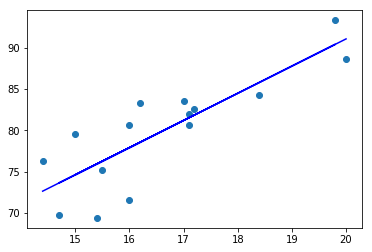

In [3]:
n = len(df)
sumX = np.sum(df["X"])
sumY = np.sum(df["Y"])
df["X^2"] = df["X"] * df["X"]
df["XY"] = df["X"] * df["Y"]
sumXX = np.sum(df["X^2"])
sumXY = np.sum(df["XY"])
P = np.matrix([[n,sumX],[sumX,sumXX]])
R = np.array([sumY,sumXY])

Q = np.linalg.solve(P,R)
print("c =",Q[0],"\nm =",Q[1],"\n")

#x = []
#for i in range(len(df)):
#    x.append([1,df["X"][i]])
#    or
x = np.c_[np.ones(len(df)),df["X"]]

y = np.dot(x,Q)
plt.scatter(df["X"],df["Y"])
plt.plot(df["X"],y,"b")
plt.show()


# Exercise 2.1.2

c = 25.232304983424836 
m = 3.291094567947636 
g = 0.019581023278658554


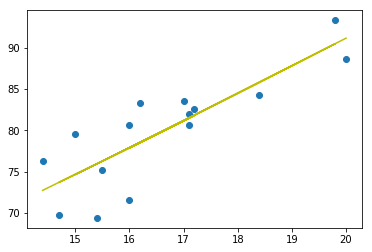

In [4]:
df["X^3"] = df["X^2"] * df["X"]
df["X^4"] = df["X^3"] * df["X"]
df["XXY"] = df["X^2"] * df["Y"]
sumXXX = np.sum(df["X^3"])
sumXXXX = np.sum(df["X^4"])
sumXXY = np.sum(df["XXY"])
P1 = np.matrix([[n,sumX,sumXX],[sumX,sumXX,sumXXX],[sumXX,sumXXX,sumXXXX]])
R1 = np.array([sumY,sumXY,sumXXY])

Q1 = np.linalg.solve(P1,R1)
print("c =",Q[0],"\nm =",Q[1],"\ng =",Q1[2])

#x1 = []
#for i in range(len(df)):
#    x1.append([1,df["X"][i],df["X^2"][i]])
#  or
x1 = np.c_[np.ones(len(df)),df["X"],df["X^2"]]

y1 = np.dot(x1,Q1)
plt.scatter(df["X"],df["Y"])
plt.plot(df["X"],y1,"y")
plt.show()


# Exercise 2.2

In [5]:

teta0 = 0
teta1 = np.linspace(1,5,10)
hypothesis = []
for i in range(len(teta1)):
    hypothesis.append([])
    for j in range(len(df)):
        hypothesis[i].append(teta0 + teta1[i] * df["X"][j])

j_teta = []
s = 0
x2 = np.c_[df["X"]]
y1 = np.c_[df["Y"]]
for i in range(len(teta1)):
    j_teta.append(np.dot((np.dot(x2,teta1[i]) - y1).T,(np.dot(x2,teta1[i]) - y1))/(2*len(y1)))
    
for i in range(10):
    print("For theta =", round(teta1[i],2), "cost =", j_teta[i])

    
mincost = min(j_teta)
print("\nThe min value of cost is",mincost,"for theta = 5.0",)

For theta = 1.0 cost = [[2022.38266349]]
For theta = 1.44 cost = [[1578.13222736]]
For theta = 1.89 cost = [[1189.19780775]]
For theta = 2.33 cost = [[855.57940466]]
For theta = 2.78 cost = [[577.27701809]]
For theta = 3.22 cost = [[354.29064803]]
For theta = 3.67 cost = [[186.6202945]]
For theta = 4.11 cost = [[74.26595749]]
For theta = 4.56 cost = [[17.22763699]]
For theta = 5.0 cost = [[15.50533302]]

The min value of cost is [[15.50533302]] for theta = 5.0


# Exercise 2.3.1

[4.79161588]


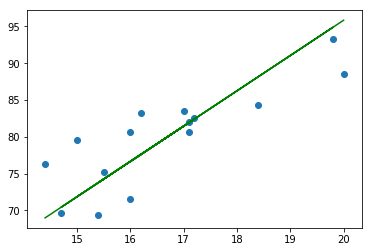

In [6]:
X1 = np.c_[df["X"]]
def cost_nobias(theta_1,X,Y):
    j = np.dot((np.dot(X,theta_1)-Y).T,(np.dot(X,theta_1)-Y))/(2*len(Y))
    return j
n_iteraters = 1000
alp = 0.001
theta_1 = 0
X2 = np.transpose(X1)
Y1 = np.c_[df["Y"]]
cost1_history = []
theta1_history = []
for i in range(n_iteraters):
    theta_1 = (theta_1 - alp * (1/len(Y1)) * np.dot(X2,(np.dot(X1,theta_1)-Y1)))
    cost1_history.append(cost_nobias(theta_1,X1,Y1))
    theta1_history.append(theta_1)
print(theta_1[0])
plt.plot(df["X"],theta_1[0]*df["X"],"g")
plt.scatter(df["X"],df["Y"])

# Exercise 2.3.2

[[0.52616898]
 [4.760376  ]]


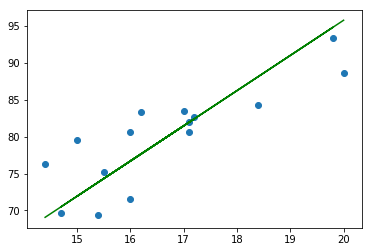

In [7]:

def cost_bias(X, Y, theta):
    J=np.dot((np.dot(X,theta) - Y).T,(np.dot(X,theta) - Y))/(2*len(Y))
    return J
alpha = 0.001 # Specify the learning rate
theta =  np.array([0,0]).T # Initial values of theta
X = np.c_[np.ones(len(df)),df["X"]]
Y = np.c_[df["Y"]]
X_1 = np.array(df["X"])
num_iters = 1000
cost_history=[]
theta_history=[]
for i in range(num_iters):
    a=np.sum(theta[0] - alpha * (1/len(Y)) * np.sum((np.dot(X,theta)- Y)))
    b=np.sum(theta[1] - alpha * (1/len(Y)) * (np.dot(X_1,(np.dot(X,theta)-Y))))
    theta= np.array([[a],[b]])
    cost_history.append(cost_bias(X,Y,theta))
    theta_history.append(theta)
print(theta)
plt.plot(df["X"],theta[0]+theta[1]*df["X"],"g")
plt.scatter(df["X"],df["Y"])

# Exercise 2.3.3

In [23]:
def cost_second_order(theta1,X,Y):
    J = np.dot((np.dot(X,theta1)-Y).T,(np.dot(X,theta1)-Y)) /(2*len(Y))
    return J
X3 = np.c_[np.ones(len(df)),df["X"],(df["X"]*df["X"])]
Y3 = np.c_[df["Y"]]
n_iter = 100
alpha1 = 0.001
theta1 = np.array([0,0,0]).T
X4 = np.array(df["X"])
X5 = np.array(df["X"] * df["X"])
cost2_history = []
theta2_history = []
for i in range(n_iter):
    a = np.sum(theta1[0] - alpha1 * (1/len(Y3)) * np.sum((np.dot(X3,theta1))-Y3))
    b = np.sum(theta1[1] - alpha1 * (1/len(Y3)) * np.dot(X4,(np.dot(X3,theta1)-Y3)))
    c = np.sum(theta1[2] - alpha1 * (1/len(Y3)) * np.dot(X5,(np.dot(X3,theta1)-Y3)))
    theta1 = np.array([[a],[b],[c]])
    cost2_history.append(cost_second_order(theta1,X3,Y3))
    theta2_history.append(theta1)
    
theta2_history
#plt.plot(df["X"],df["X"]*theta1[1]+df["X"]*df["X"]*theta1[2]+theta1[0])

[array([[  1.2006    ],
        [ 20.12747   ],
        [340.81488729]]), array([[   -94.49664237],
        [ -1605.35130799],
        [-27556.61172946]]), array([[   7649.29241733],
        [ 129926.46590289],
        [2229845.9720908 ]]), array([[-6.18962106e+05],
        [-1.05133576e+07],
        [-1.80434551e+08]]), array([[5.00851500e+07],
        [8.50719407e+08],
        [1.46003946e+10]]), array([[-4.05278783e+09],
        [-6.88384732e+10],
        [-1.18143405e+12]]), array([[3.27943296e+11],
        [5.57026837e+12],
        [9.55992254e+13]]), array([[-2.65365004e+13],
        [-4.50734716e+14],
        [-7.73569366e+15]]), array([[2.14727930e+15],
        [3.64725307e+16],
        [6.25956499e+17]]), array([[-1.73753446e+17],
        [-2.95128254e+18],
        [-5.06511188e+19]]), array([[1.40597733e+19],
        [2.38811743e+20],
        [4.09858487e+21]]), array([[-1.13768808e+21],
        [-1.93241575e+22],
        [-3.31649099e+23]]), array([[9.20593907e+22],
        

In [16]:

df1 = pd.read_excel("E:\ML Activities\Activity_2\Activity_2_Data.xlsx")
df1

,days,comp_1,comp_2,comp_3,comp_4,comp_5,comp_6,comp_7,comp_8,comp_9,comp_10
0,1,1.537667,2.417903,249.582809,3.544343,106.021052,52.738315,256.800947,10.591592,200.075334,58.548129
1,2,3.833885,7.621198,250.697571,8.544828,115.831155,59.269258,246.477383,21.794695,201.667770,58.272586
2,3,0.741153,-8.730037,250.084524,11.743345,98.689107,38.855204,235.640427,30.435872,192.482306,55.642229
3,4,4.862173,3.775095,245.842763,11.240605,117.604729,54.509536,222.272354,34.692342,197.724347,56.205949
4,5,5.318765,1.623964,243.321944,12.387840,118.183439,51.841230,211.617129,39.984465,195.637530,55.144703
5,6,4.692312,-4.857797,243.880057,16.544579,113.328492,43.757079,204.937122,47.734213,191.384623,53.578126
6,7,6.566408,-1.335701,240.726257,16.921482,120.954220,48.174938,195.354980,51.208654,192.132816,53.172553
7,8,8.342624,1.796649,239.152701,18.812174,128.064861,52.102541,188.084594,55.752353,192.685249,52.736432
8,9,12.578397,14.769117,244.246472,27.305172,147.444005,68.326950,188.142243,66.499828,198.156794,53.478218
9,10,12.769437,11.564682,241.264487,27.658796,146.566655,64.326611,180.720790,68.750930,195.538874,52.330410


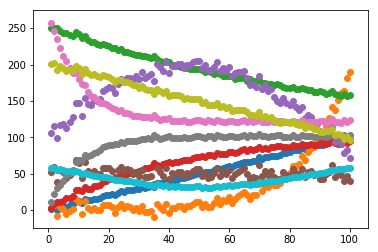

In [18]:
comp = ["comp_1","comp_2","comp_3","comp_4","comp_5","comp_6","comp_7","comp_8","comp_9","comp_10"]
for i in comp:
     plt.scatter(df1["days"],df1[i])


In [19]:


alph = 0.00001
n_itera = 100

def fit(X,Y):
    theta = np.array([0,0]).T
    X1 = np.c_[np.ones(len(X)),X]
    for i in range(n_itera):
        a = np.sum(theta[0] - alph * (1/len(Y)) * np.sum(np.dot(X1,theta)-Y))
        b = np.sum(theta[1] - alph * (1/len(Y)) * np.dot(X,(np.dot(X1,theta)-Y)))
        theta = np.array([[a],[b]])
    return theta

def predict(n,X,Y,theta0):
    
    next0 = []
    for i in range(n):
        X1 = np.c_[1,[100+i]]
        next0.append(np.sum(np.dot(X1,theta0)))
    return next0   

theta0_history = []
next3_history = []
next7_history = []
days = np.array(df1["days"])
for i in range(10):
    price = np.c_[df1[comp[i]]]
    theta0 = fit(days,price)
    theta0_history.append(theta0)
    y1 = predict(3,days,price,theta0)
    next3_history.append(y1)
    y2 = predict(7,days,price,theta0)
    next7_history.append(y2)
days3 = [100,101,102]
days7 = [100,101,102,103,104,105,106]
dic3 = {"days":days3,"comp_1":next3_history[0],"comp_2":next3_history[1],"comp_3":next3_history[2],"comp_4":next3_history[3],
       "comp_5":next3_history[4],"comp_6":next3_history[5],"comp_7":next3_history[6],"comp_8":next3_history[7],
       "comp_9":next3_history[8],"comp_10":next3_history[9]}
dic3 = pd.DataFrame(dic3)
dic7 = {"days":days7,"comp_1":next7_history[0],"comp_2":next7_history[1],"comp_3":next7_history[2],"comp_4":next7_history[3],
       "comp_5":next7_history[4],"comp_6":next7_history[5],"comp_7":next7_history[6],"comp_8":next7_history[7],
       "comp_9":next7_history[8],"comp_10":next7_history[9]}
dic7 = pd.DataFrame(dic7)

print("Prediction for next 3 days\n")
print(dic3)
print("\nPrediction for next 7 days \n")
print(dic7)
theta0_history

Prediction for next 3 days

   days      comp_1     comp_2      comp_3      comp_4      comp_5     comp_6  \
0   100  107.892398  83.094271  290.966770  127.251923  249.166892  80.234366   
1   101  108.971158  83.925248  293.874811  128.524133  251.657328  81.036327   
2   102  110.049919  84.756226  296.782852  129.796343  254.147763  81.838289   

       comp_7      comp_8      comp_9    comp_10  
0  200.700824  160.548934  214.149779  67.855431  
1  202.706694  162.153842  216.289973  68.533680  
2  204.712565  163.758751  218.430167  69.211929  

Prediction for next 7 days 

   days      comp_1     comp_2      comp_3      comp_4      comp_5     comp_6  \
0   100  107.892398  83.094271  290.966770  127.251923  249.166892  80.234366   
1   101  108.971158  83.925248  293.874811  128.524133  251.657328  81.036327   
2   102  110.049919  84.756226  296.782852  129.796343  254.147763  81.838289   
3   103  111.128680  85.587203  299.690893  131.068553  256.638198  82.640250   
4   104 

[array([[0.01633031],
        [1.07876067]]), array([[-0.00348252],
        [ 0.83097753]]), array([[0.16267548],
        [2.90804095]]), array([[0.03091594],
        [1.27221007]]), array([[0.12334568],
        [2.49043546]]), array([[0.03821403],
        [0.80196152]]), array([[0.11375005],
        [2.00587074]]), array([[0.05808924],
        [1.60490844]]), array([[0.13039912],
        [2.1401938 ]]), array([[0.03053965],
        [0.67824891]])]